In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns

from src.config import CATEGORICAL_COLUMNS, NUMERICAL_COLUMNS, LABEL_COLUMN

In [6]:
user_dataset_path = "../data/users_train.csv"
user_dataset = pd.read_csv(
    user_dataset_path,
    index_col=0,
    parse_dates=["user_first_engagement"],
)

# Data Validation

In [3]:
user_dataset.dtypes

user_pseudo_id                  object
is_enable                        int64
bounced                          int64
country_name                    object
device_os                       object
device_lang                     object
cnt_user_engagement              int64
cnt_level_start_quickplay        int64
cnt_level_end_quickplay          int64
cnt_level_complete_quickplay     int64
cnt_level_reset_quickplay        int64
cnt_post_score                   int64
cnt_spend_virtual_currency       int64
cnt_ad_reward                    int64
cnt_challenge_a_friend           int64
cnt_completed_5_levels           int64
cnt_use_extra_steps              int64
churned                          int64
dtype: object

# Pandas Profiling

In [4]:
profile = ProfileReport(user_dataset, title="Pandas Profiling Report", explorative=True)

profile.to_widgets()

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
with open('report.html', 'w') as file:
    file.write(profile.to_html())

# EDA
## temporal evolution

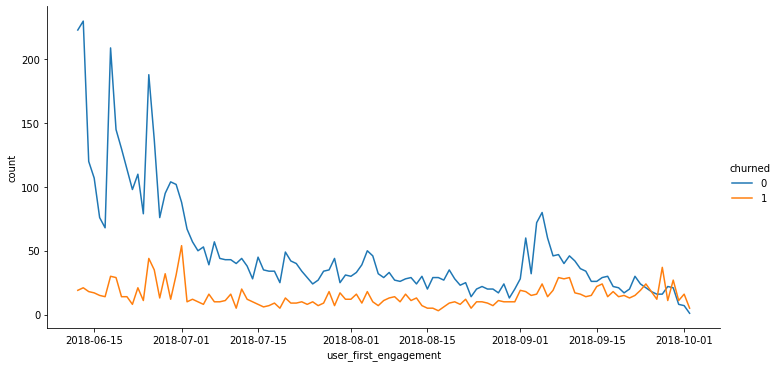

In [7]:
data_plot = (
    user_dataset.groupby(LABEL_COLUMN)[LABEL_COLUMN]
    .resample("D")
    .count()
    .rename("count")
    .reset_index()
)
sns.relplot(
    data=data_plot,
    x="user_first_engagement",
    y="count",
    hue=LABEL_COLUMN,
    kind="line",
    height=5,
    aspect=2
)

## 

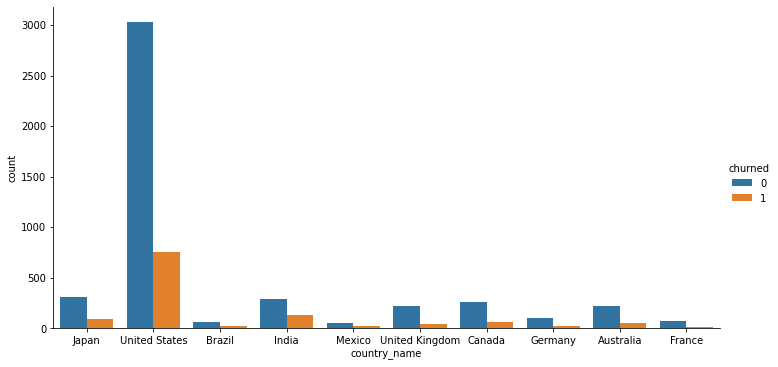

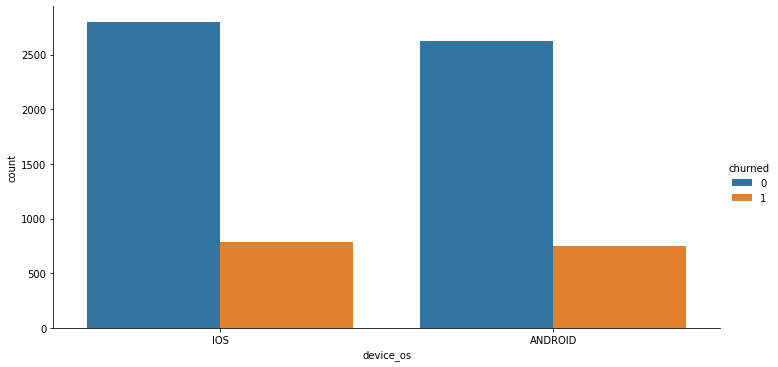

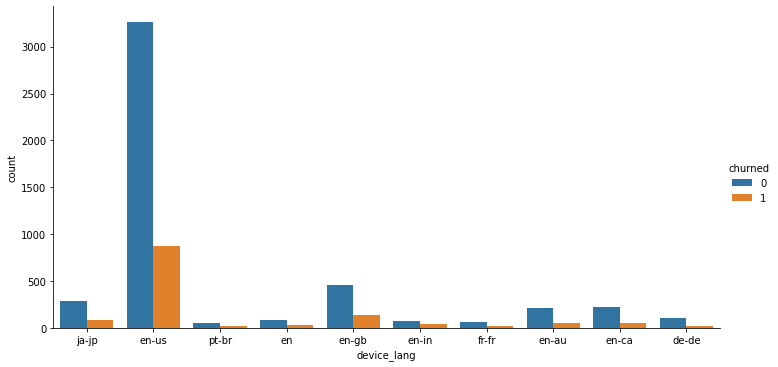

In [9]:
for cat_col in CATEGORICAL_COLUMNS:
    selector = user_dataset[cat_col].isin(user_dataset[cat_col].value_counts().iloc[:10].index.to_list())
    sns.catplot(
        x=cat_col,
        hue=LABEL_COLUMN,
        #col_wrap=4,
        data=user_dataset.loc[selector,:].dropna(),
        kind="count",
        height=5,
        aspect=2,
    )

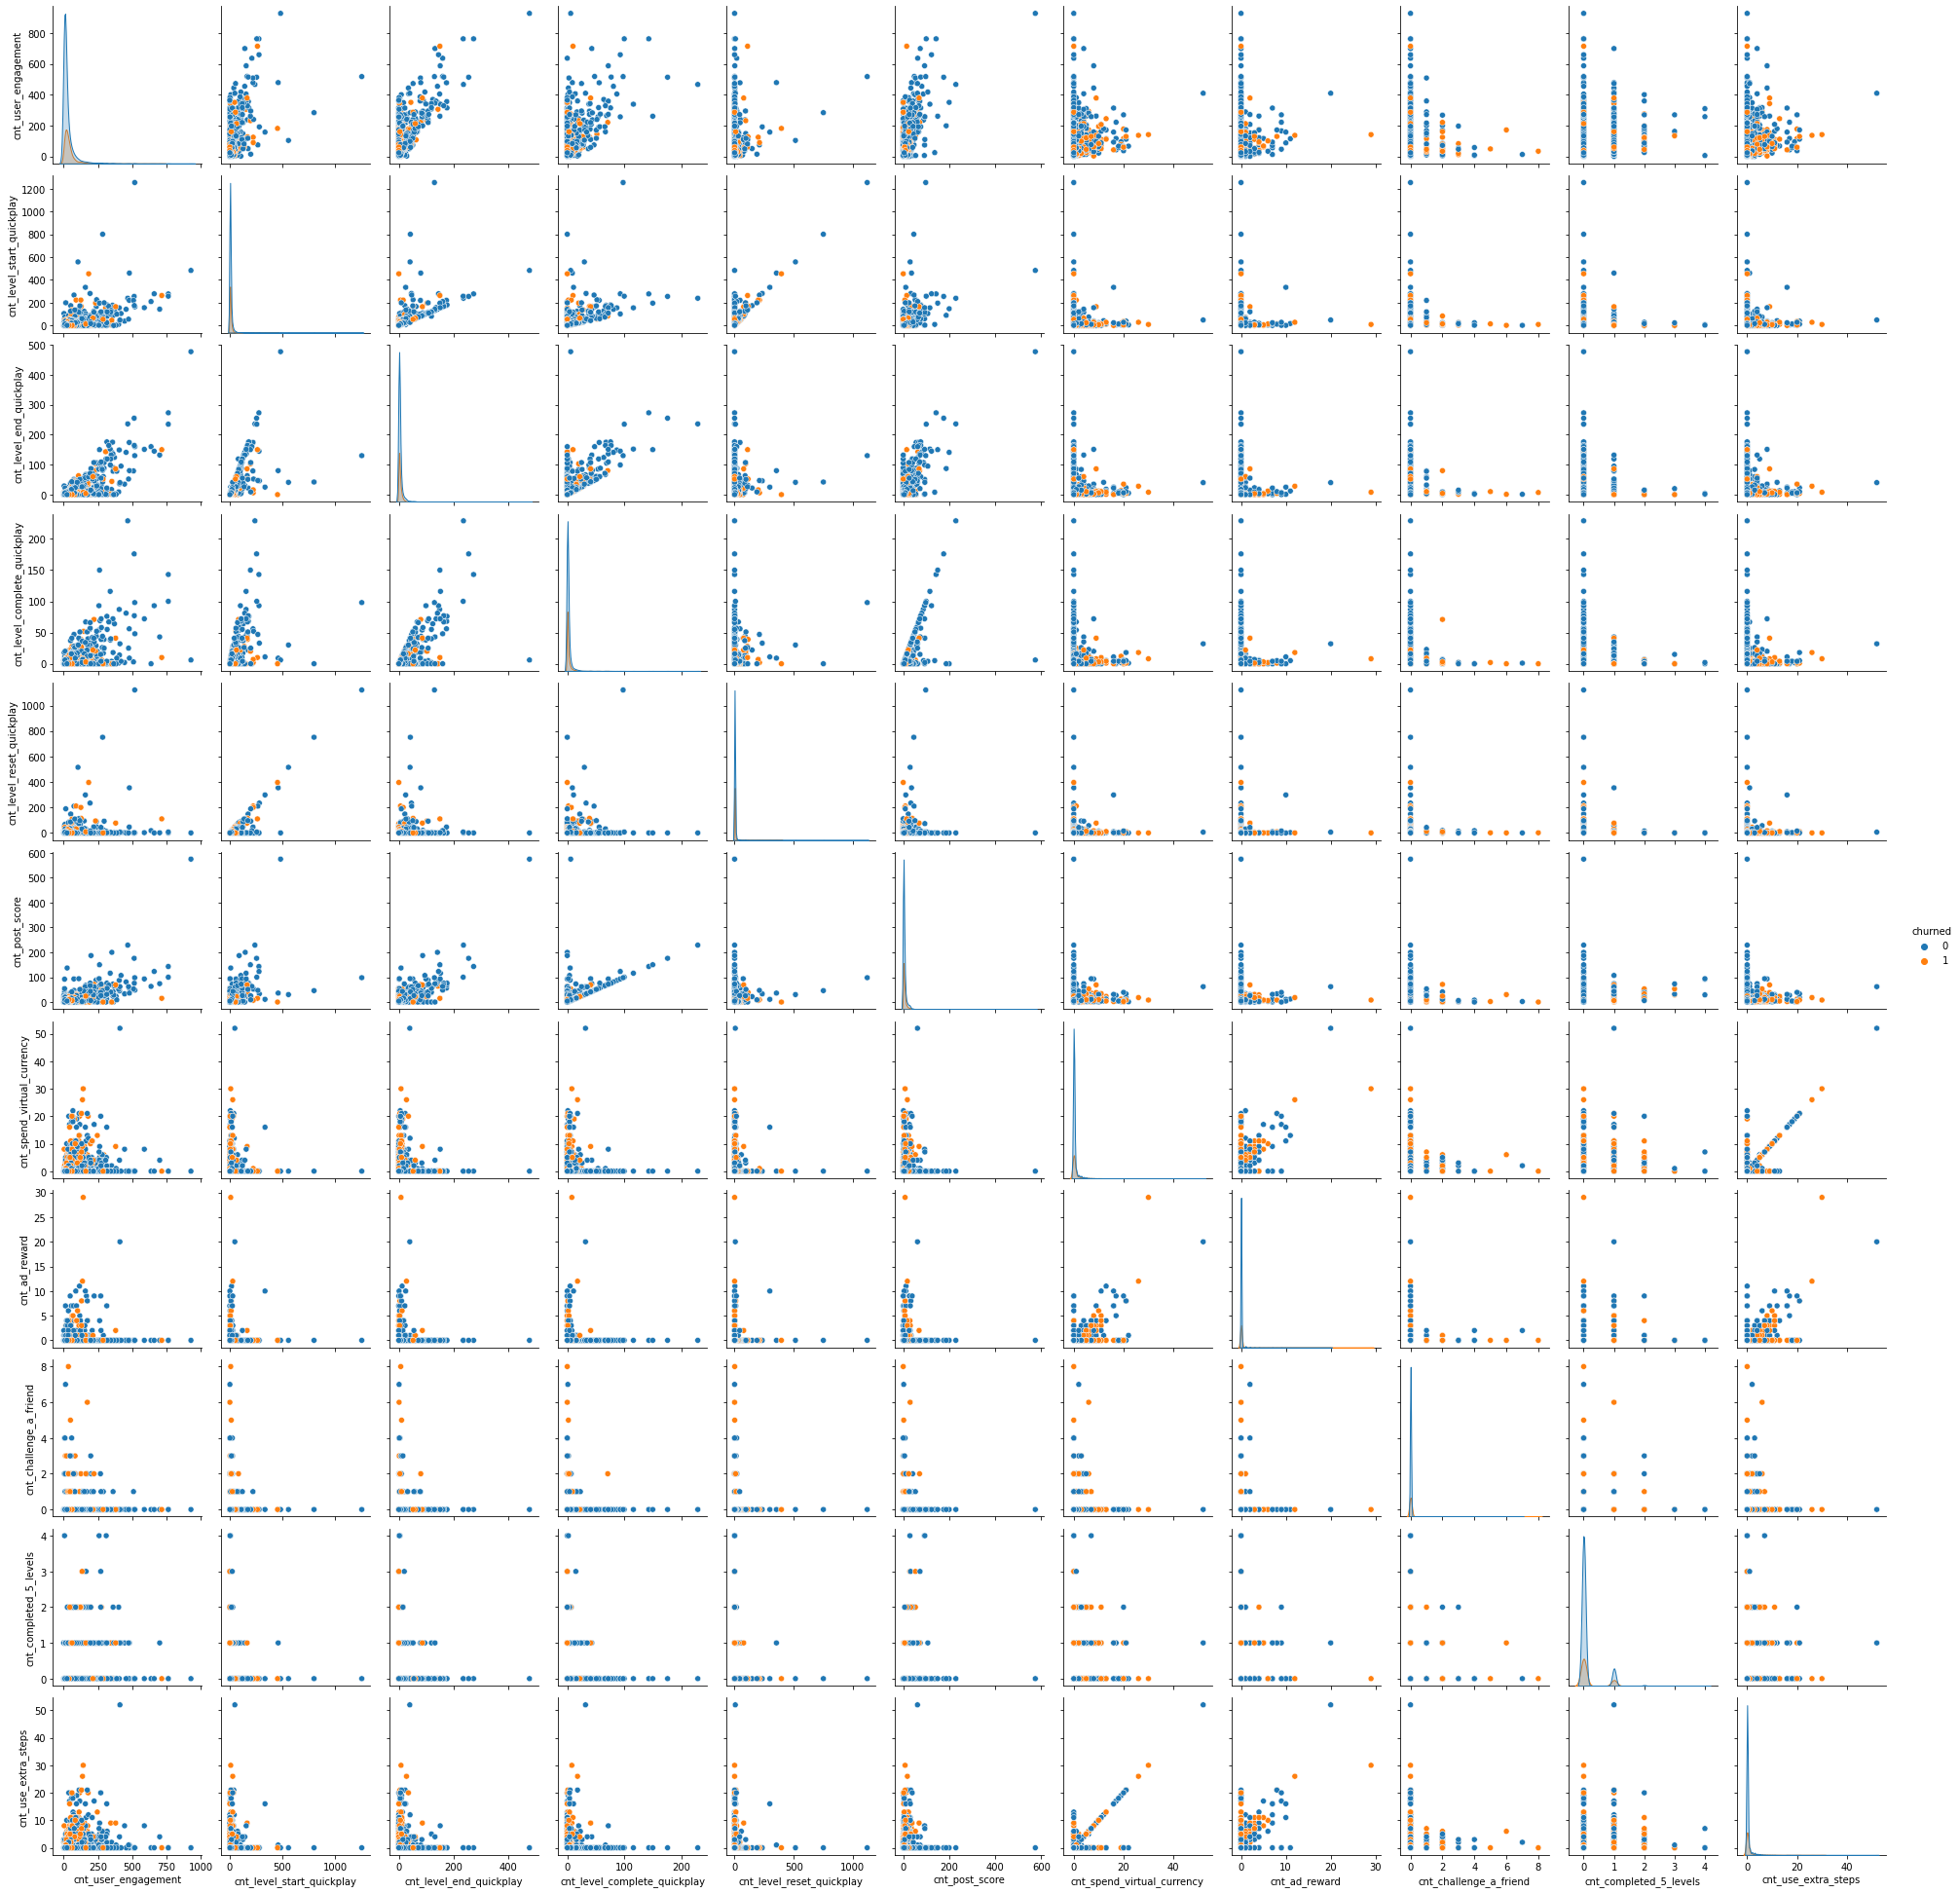

In [10]:
sns.pairplot(data=user_dataset[NUMERICAL_COLUMNS+[LABEL_COLUMN]], hue=LABEL_COLUMN)
